# Import packages

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
n = 2
x = cp.Variable(n)
P = np.array([[1,-.5],[-.5,2]])
q = np.array([-1,0])
G = np.array([[1,2],[1,-4],[-1,-1]])
u1 = -2
u2 = -3
h = np.array([u1,u2,5])

x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h])

prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 8.222222222222223
A solution x is
[-2.33333333  0.16666667]
A dual solution corresponding to the inequality constraints is
[3.38888889 2.44444444 0.        ]


In [6]:
orig_p = prob.value
orig_lambdas = prob.constraints[0].dual_value

In [7]:
orig_p

8.222222222222223

## Part B

In [9]:
perturbation_range = [-0.1,0,0.1]
for delta1 in perturbation_range:
  for delta2 in perturbation_range:
    print("=======")
    print(delta1)
    print(delta2)
    print("=======")

    predicted_p = orig_p - np.dot(orig_lambdas,np.array([delta1,delta2,0]))
    n = 2
    x = cp.Variable(n)
    P = np.array([[1,-.5],[-.5,2]])
    q = np.array([-1,0])
    G = np.array([[1,2],[1,-4],[-1,-1]])
    u1 = -2 + delta1
    u2 = -3 + delta2
    h = np.array([u1,u2,5])

    x = cp.Variable(n)
    prob = cp.Problem(cp.Minimize(cp.quad_form(x, P) + q.T @ x),
                    [G @ x <= h])

    prob.solve()

    p_exact = prob.value
    print(p_exact-predicted_p)

-0.1
-0.1
0.009999999999996234
-0.1
0
0.0038888888888877204
-0.1
0.1
0.002222222222219017
0
-0.1
0.0022222222222207932
0
0
0.0
0
0.1
0.0022222222222181287
0.1
-0.1
0.002222222222219017
0.1
0
0.003888888888885944
0.1
0.1
0.009999999999997122


# Exercise 2

In [12]:
x = cp.Variable(1)
prob = cp.Problem(cp.Minimize(x**2+1),
                 [(x**2-6*x+8) <= 0])

prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 4.999999979918552
A solution x is
[2.]
A dual solution corresponding to the inequality constraints is
[2.00003221]


In [19]:
x = np.arange(-3,3,0.1)
f = lambda x: x**2 + 2*x - 8

In [20]:
y = f(x)

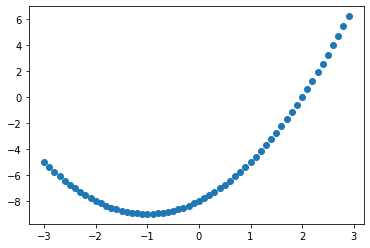

In [21]:
plt.scatter(x,y)

# Exercise 3

In [44]:
r=1.05 # risk-free rate
m=200 # scenarios
n=7 # assets
V=np.zeros((m,n)) # value/payoff matrix
V[:,0] = r # risk-free asset
V[:,1] = np.linspace(0.5,2,m) # underlying
# the four exchange traded options:
V[:,2] = np.maximum(V[:,1] - 1.1,0);
V[:,3] = np.maximum(V[:,1] - 1.2,0);
V[:,4] = np.maximum(0.8-V[:,1],0);
V[:,5] = np.maximum(0.7-V[:,1],0);
# collar option:
F=0.9
C=1.15
V[:,6] = np.minimum(np.maximum(V[:,1]-1,F-1),C-1);
p = [1, 1, 0.06, 0.03, 0.02, 0.01] # asset prices (from exchange)

# cvx_begin
# variables p_collar y(m)
# minimize p_collar
# %maximize p_collar
# y>=0
# V’*y== [p; p_collar]
# cvx_end

In [45]:
p_collar = cp.Variable(1)
y = cp.Variable(m)
prob = cp.Problem(cp.Maximize(p_collar),
                 [y >= 0,
                  V.T@y == np.array(p.append(p_collar))])

prob.solve(verbose=True,solver='SCS')

# Print result.
print("\nThe optimal value is", prob.value)

WARN: A->p (column pointers) not strictly increasing, column 0 empty
----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 1094
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 201, constraints m = 207
Cones:	primal zero / dual free vars: 7
	linear vars: 200
Setup time: 5.01e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      nan      -nan       nan      -nan      -nan      -nan  6.22e-03 
   100|      nan      -nan       nan      -nan      -nan      -nan  1.32e-02 
   200|      nan      -

In [40]:
V

array([[ 1.05      ,  0.5       ,  0.        , ...,  0.3       ,
         0.2       , -0.1       ],
       [ 1.05      ,  0.50753769,  0.        , ...,  0.29246231,
         0.19246231, -0.1       ],
       [ 1.05      ,  0.51507538,  0.        , ...,  0.28492462,
         0.18492462, -0.1       ],
       ...,
       [ 1.05      ,  1.98492462,  0.88492462, ...,  0.        ,
         0.        ,  0.15      ],
       [ 1.05      ,  1.99246231,  0.89246231, ...,  0.        ,
         0.        ,  0.15      ],
       [ 1.05      ,  2.        ,  0.9       , ...,  0.        ,
         0.        ,  0.15      ]])

In [30]:
V[:,1]

array([0.5       , 0.50753769, 0.51507538, 0.52261307, 0.53015075,
       0.53768844, 0.54522613, 0.55276382, 0.56030151, 0.5678392 ,
       0.57537688, 0.58291457, 0.59045226, 0.59798995, 0.60552764,
       0.61306533, 0.62060302, 0.6281407 , 0.63567839, 0.64321608,
       0.65075377, 0.65829146, 0.66582915, 0.67336683, 0.68090452,
       0.68844221, 0.6959799 , 0.70351759, 0.71105528, 0.71859296,
       0.72613065, 0.73366834, 0.74120603, 0.74874372, 0.75628141,
       0.7638191 , 0.77135678, 0.77889447, 0.78643216, 0.79396985,
       0.80150754, 0.80904523, 0.81658291, 0.8241206 , 0.83165829,
       0.83919598, 0.84673367, 0.85427136, 0.86180905, 0.86934673,
       0.87688442, 0.88442211, 0.8919598 , 0.89949749, 0.90703518,
       0.91457286, 0.92211055, 0.92964824, 0.93718593, 0.94472362,
       0.95226131, 0.95979899, 0.96733668, 0.97487437, 0.98241206,
       0.98994975, 0.99748744, 1.00502513, 1.01256281, 1.0201005 ,
       1.02763819, 1.03517588, 1.04271357, 1.05025126, 1.05778

# Exercise 4

In [ ]:
https://www.cvxpy.org/tutorial/functions/index.html